In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import os
csv_path = os.getenv("HOME")+'/aiffel/pokemon_eda/data/Pokemon.csv'
original_data = pd.read_csv(csv_path)

In [3]:
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

In [4]:
legendary = pokemon[pokemon['Legendary']==True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


#                 Name    Type 1    Type 2  Total   HP  Attack  Defense  \
0  144             Articuno       Ice    Flying    580   90      85      100   
1  145               Zapdos  Electric    Flying    580   90      90       85   
2  146              Moltres      Fire    Flying    580   90     100       90   
3  150               Mewtwo   Psychic       NaN    680  106     110       90   
4  150  MewtwoMega Mewtwo X   Psychic  Fighting    780  106     190      100   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       95      125     85           1       True  
1      125       90    100           1       True  
2      125       85     90           1       True  
3      154       90    130           1       True  
4      154      100    130           1       True

In [5]:
ordinary = pokemon[pokemon['Legendary']==False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

In [6]:
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [7]:
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Bug', 'Grass', 'Dark', 'Water', 'Ice', 'Rock', 'Dragon', 'Ground', 'Flying', 'Psychic', 'Poison', 'Fire', 'Electric', 'Fairy', 'Ghost', 'Fighting', 'Steel', 'Normal']


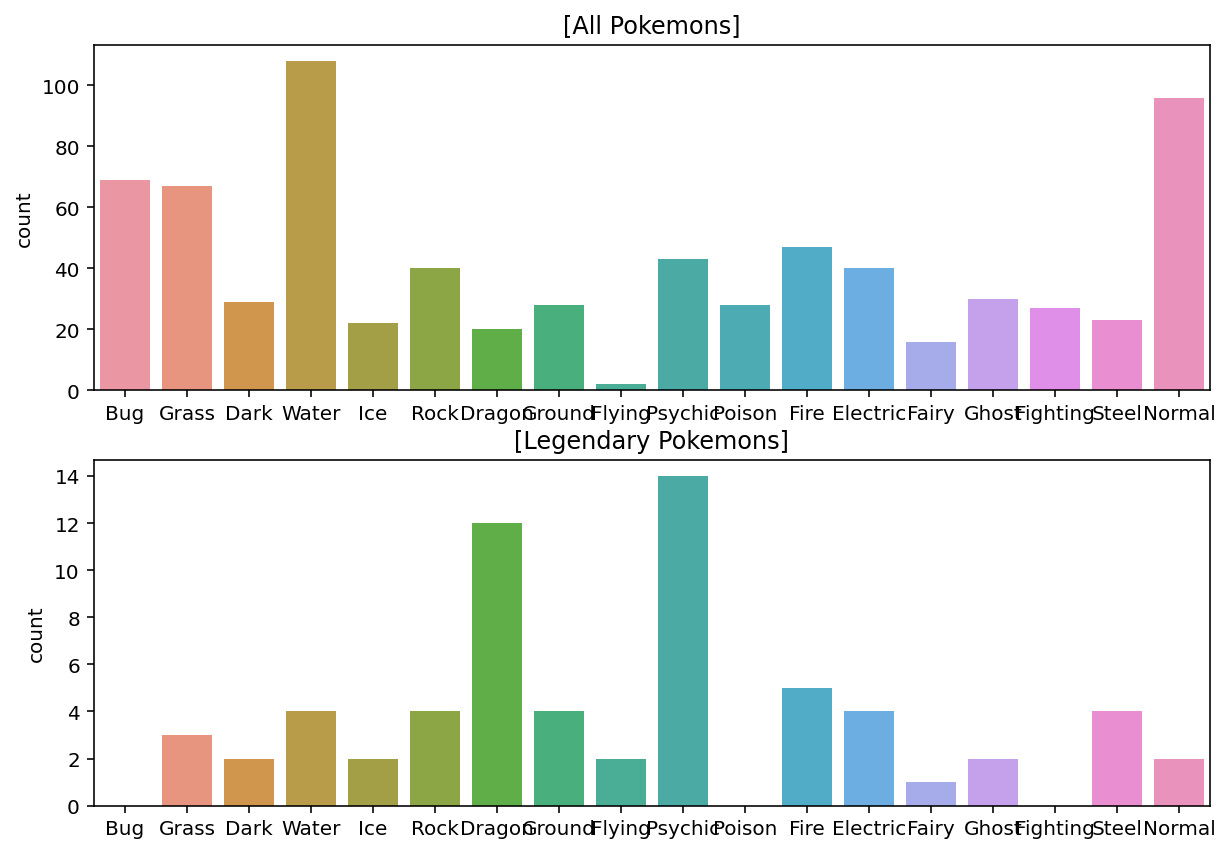

In [8]:
plt.figure(figsize=(10, 7))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[All Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [9]:
# Type1별로 Legendary 의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

Legendary
Type 1             
Flying     0.500000
Dragon     0.375000
Psychic    0.245614
Steel      0.148148
Ground     0.125000
Fire       0.096154
Electric   0.090909
Rock       0.090909
Ice        0.083333
Dark       0.064516
Ghost      0.062500
Fairy      0.058824
Grass      0.042857
Water      0.035714
Normal     0.020408
Poison     0.000000
Fighting   0.000000
Bug        0.000000

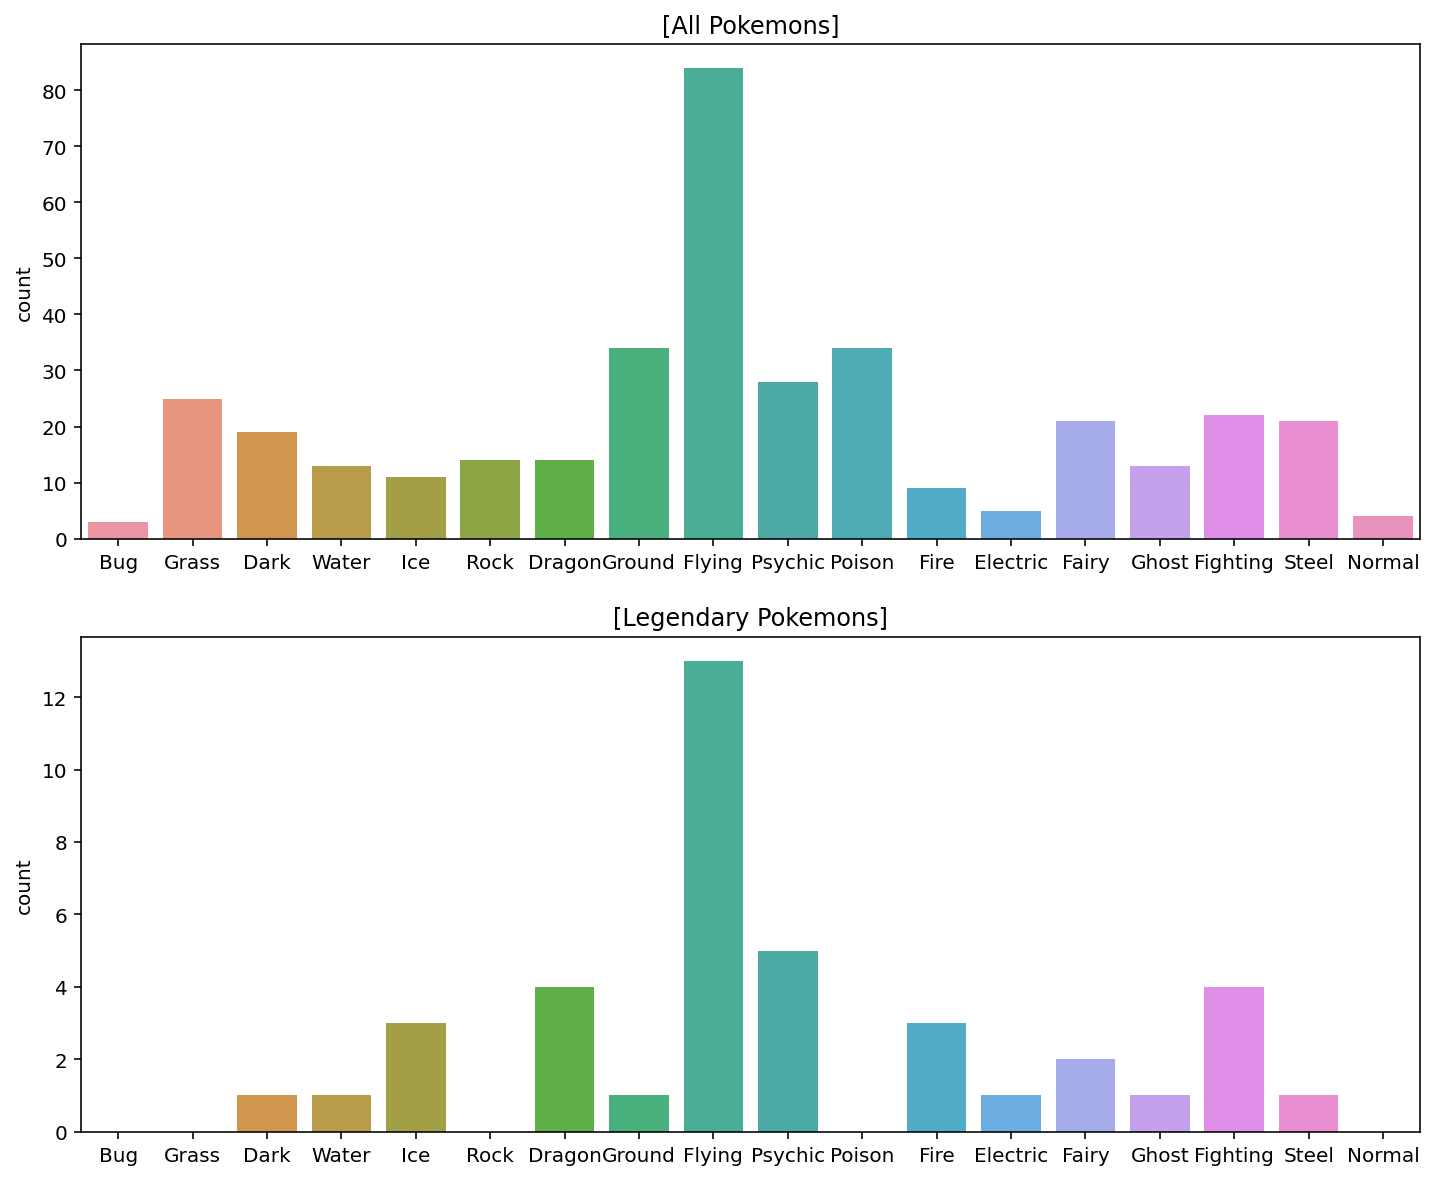

In [10]:
plt.figure(figsize=(12, 10))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 2", order=types).set_xlabel('')
plt.title("[All Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 2", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [11]:
# Type2별로 Legendary 의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False)

Legendary
Type 2             
Fire       0.250000
Dragon     0.222222
Ice        0.214286
Electric   0.166667
Fighting   0.153846
Psychic    0.151515
Flying     0.134021
Fairy      0.086957
Water      0.071429
Ghost      0.071429
Dark       0.050000
Steel      0.045455
Ground     0.028571
Rock       0.000000
Bug        0.000000
Poison     0.000000
Normal     0.000000
Grass      0.000000

In [12]:
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [13]:
print("#0 pokemon: {}\n".format(pokemon.loc[0, "Name"]))
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, stats]))
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon: Bulbasaur

total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


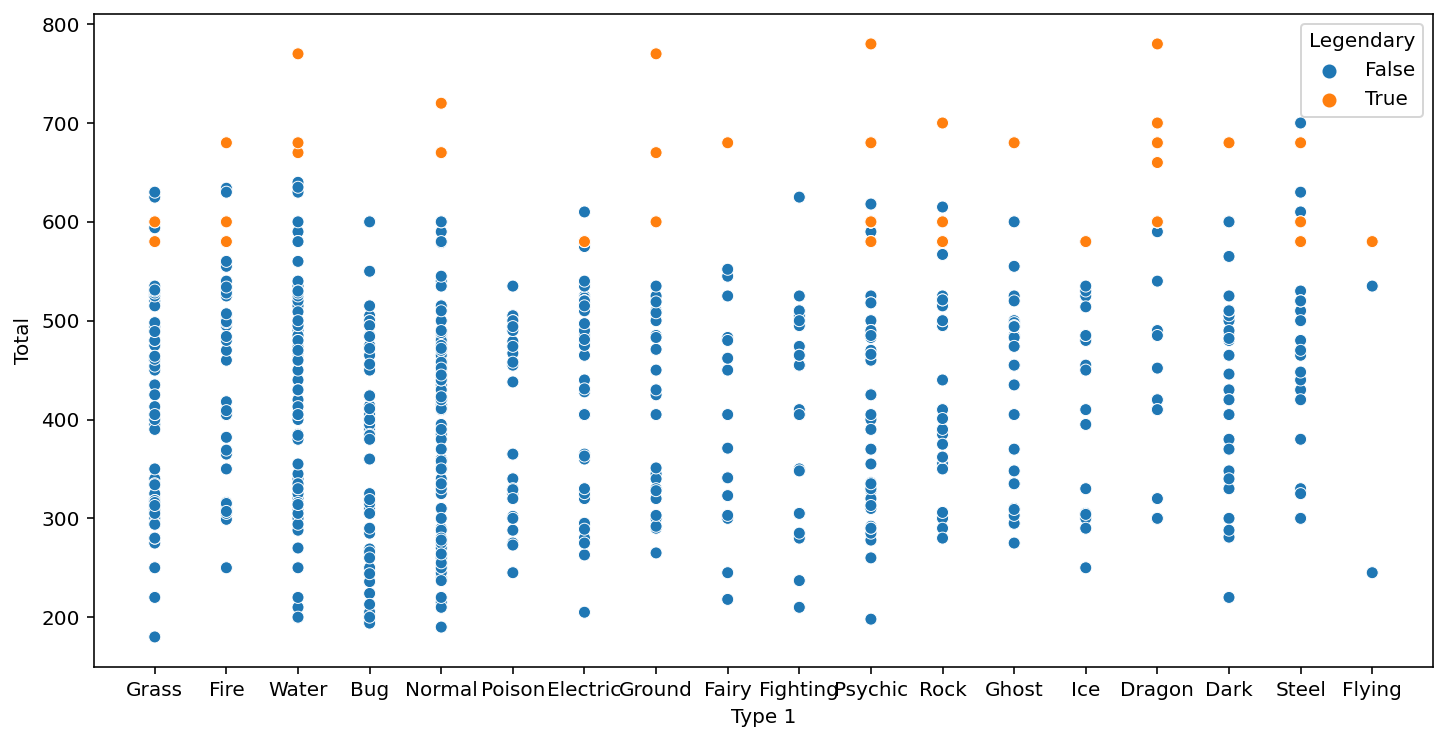

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")
plt.show()

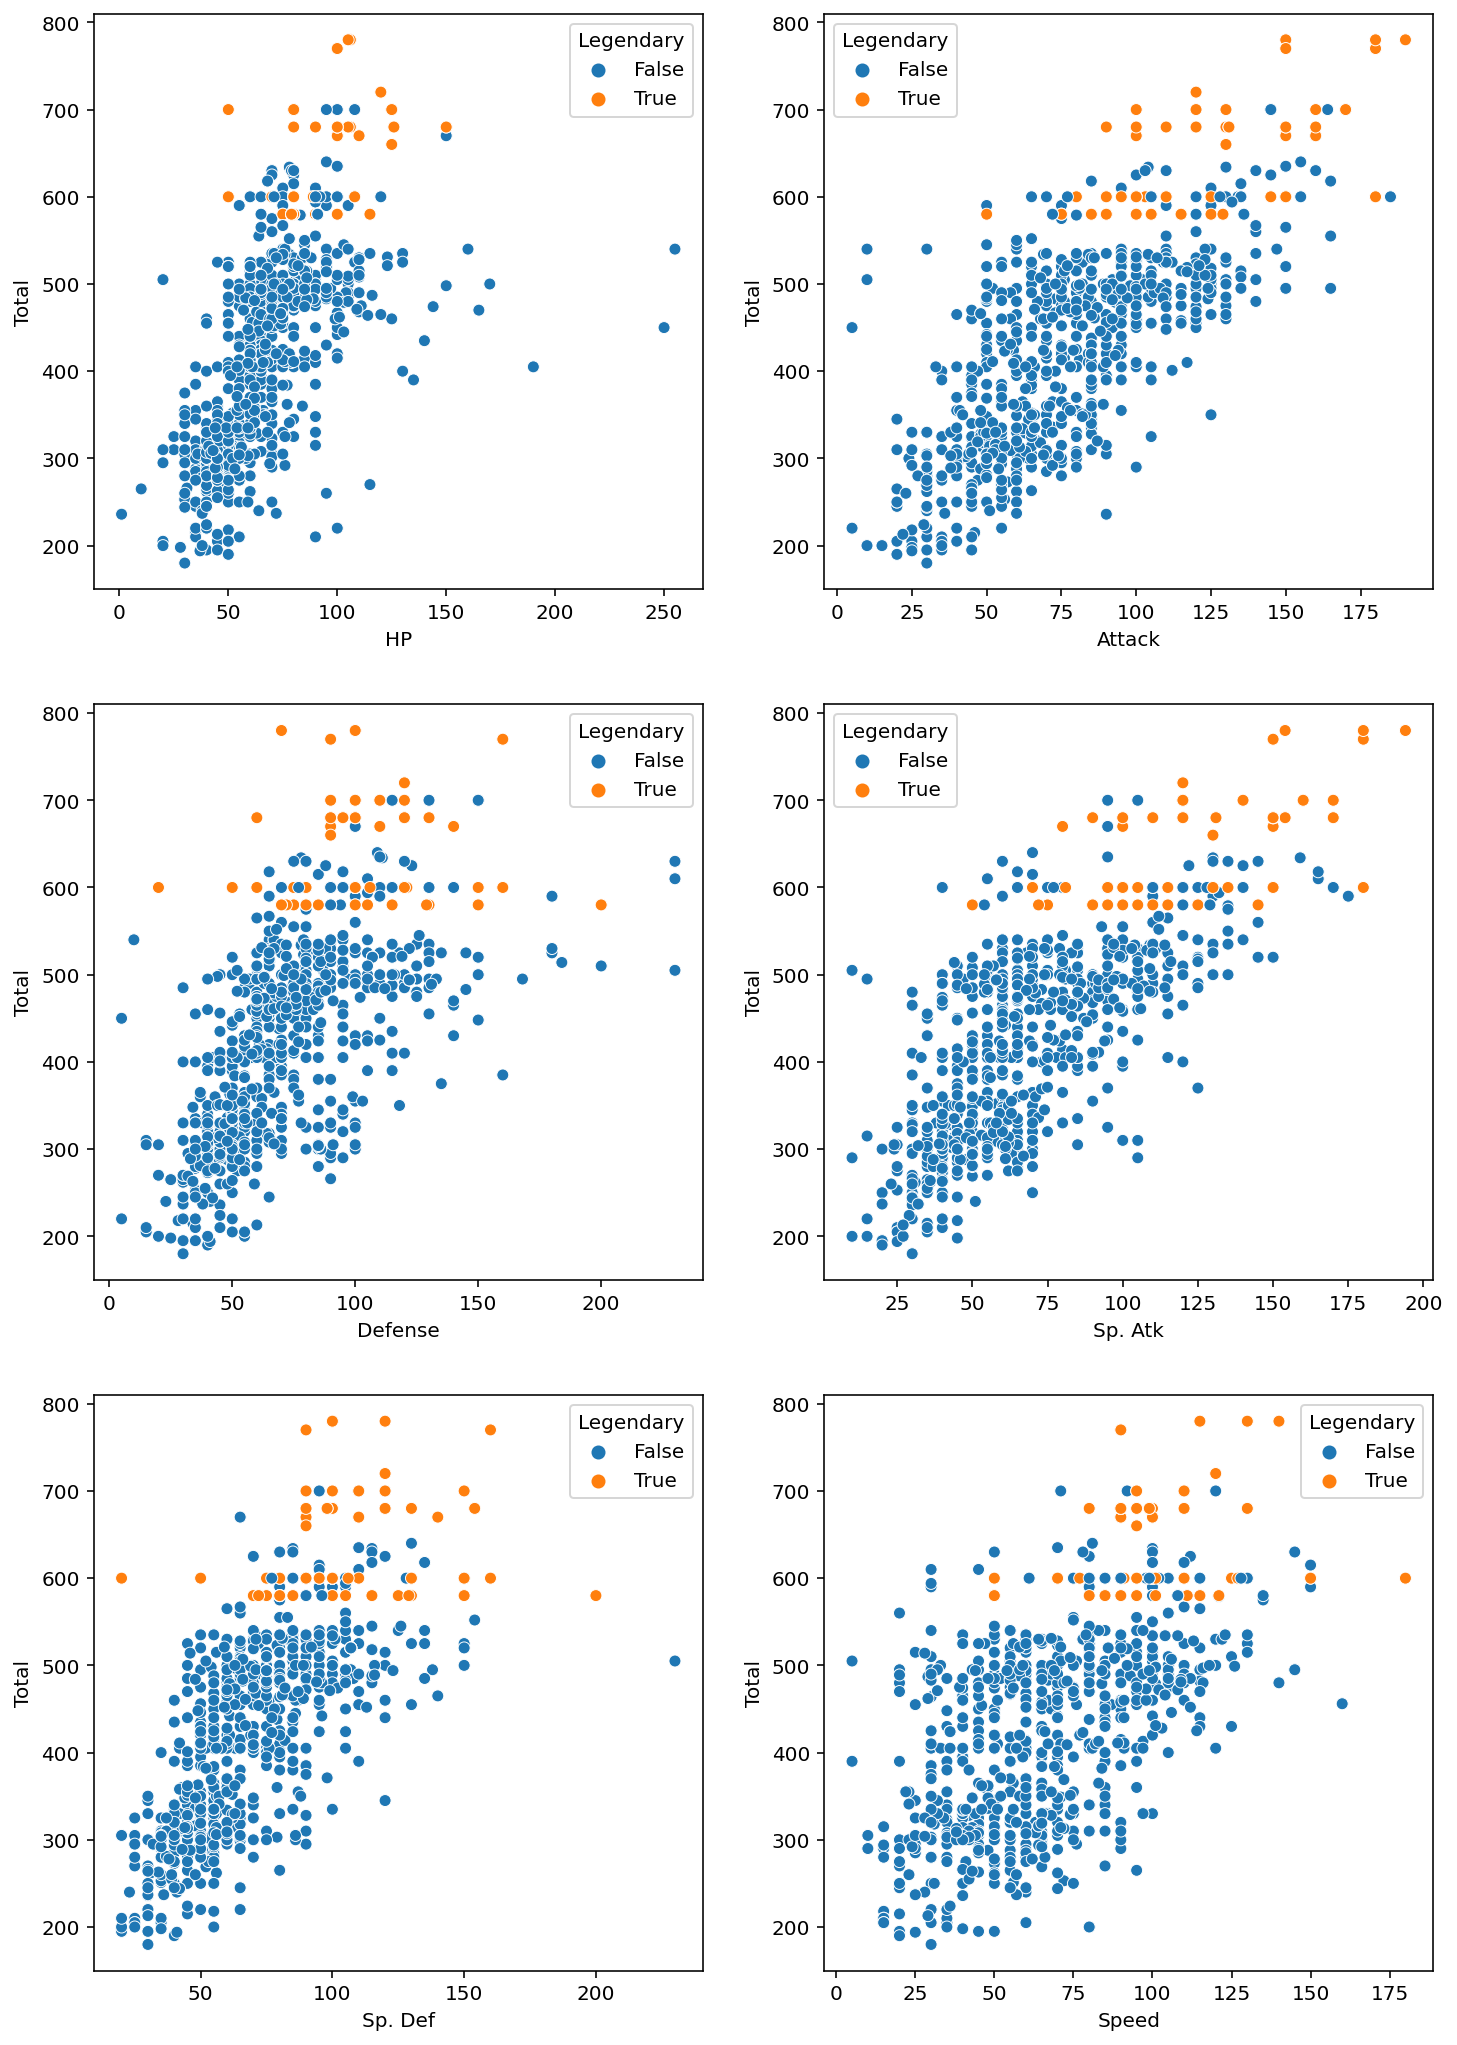

In [15]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(12, 18)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)
plt.show()

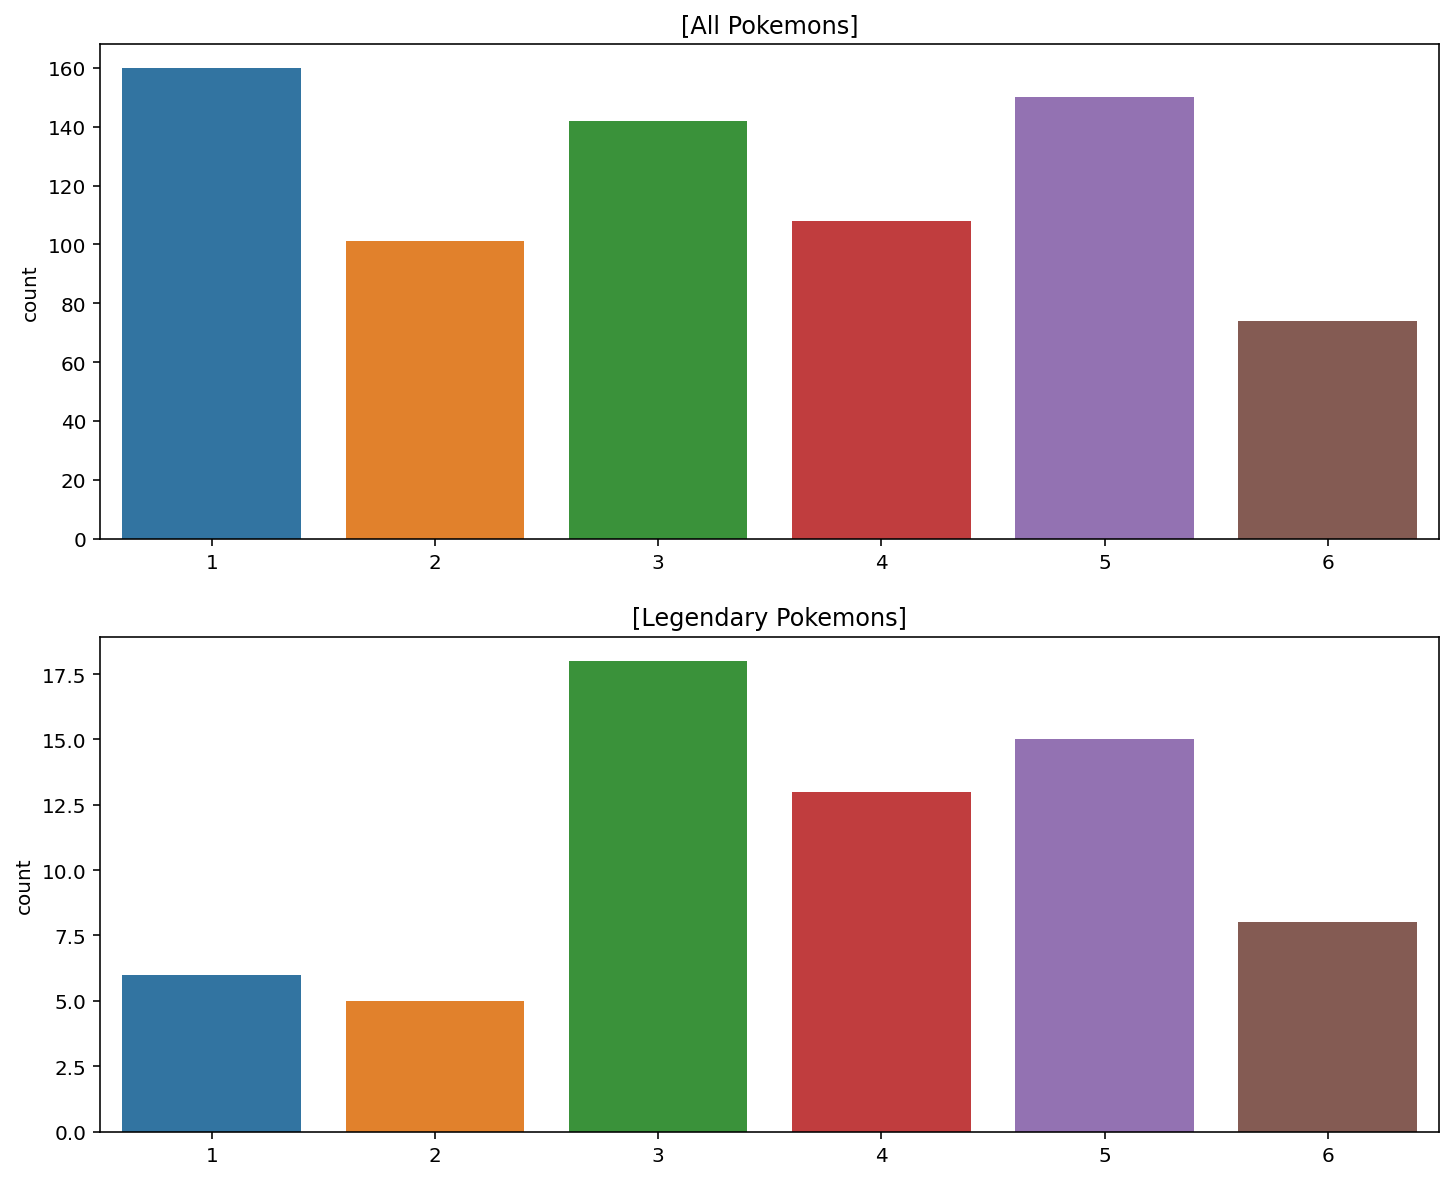

In [16]:
plt.figure(figsize=(12, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[All Pokemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.show()

In [17]:
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))    
legendary.head()

#                 Name    Type 1    Type 2  Total   HP  Attack  Defense  \
0  144             Articuno       Ice    Flying    580   90      85      100   
1  145               Zapdos  Electric    Flying    580   90      90       85   
2  146              Moltres      Fire    Flying    580   90     100       90   
3  150               Mewtwo   Psychic       NaN    680  106     110       90   
4  150  MewtwoMega Mewtwo X   Psychic  Fighting    780  106     190      100   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  name_count  
0       95      125     85           1       True           8  
1      125       90    100           1       True           6  
2      125       85     90           1       True           7  
3      154       90    130           1       True           6  
4      154      100    130           1       True          19

In [18]:
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))    
ordinary.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  name_count  
0       65       65     45           1      False           9  
1       80       80     60           1      False           7  
2      100      100     80           1      False           8  
3      122      120     80           1      False          21  
4       60       50     65           1      False          10

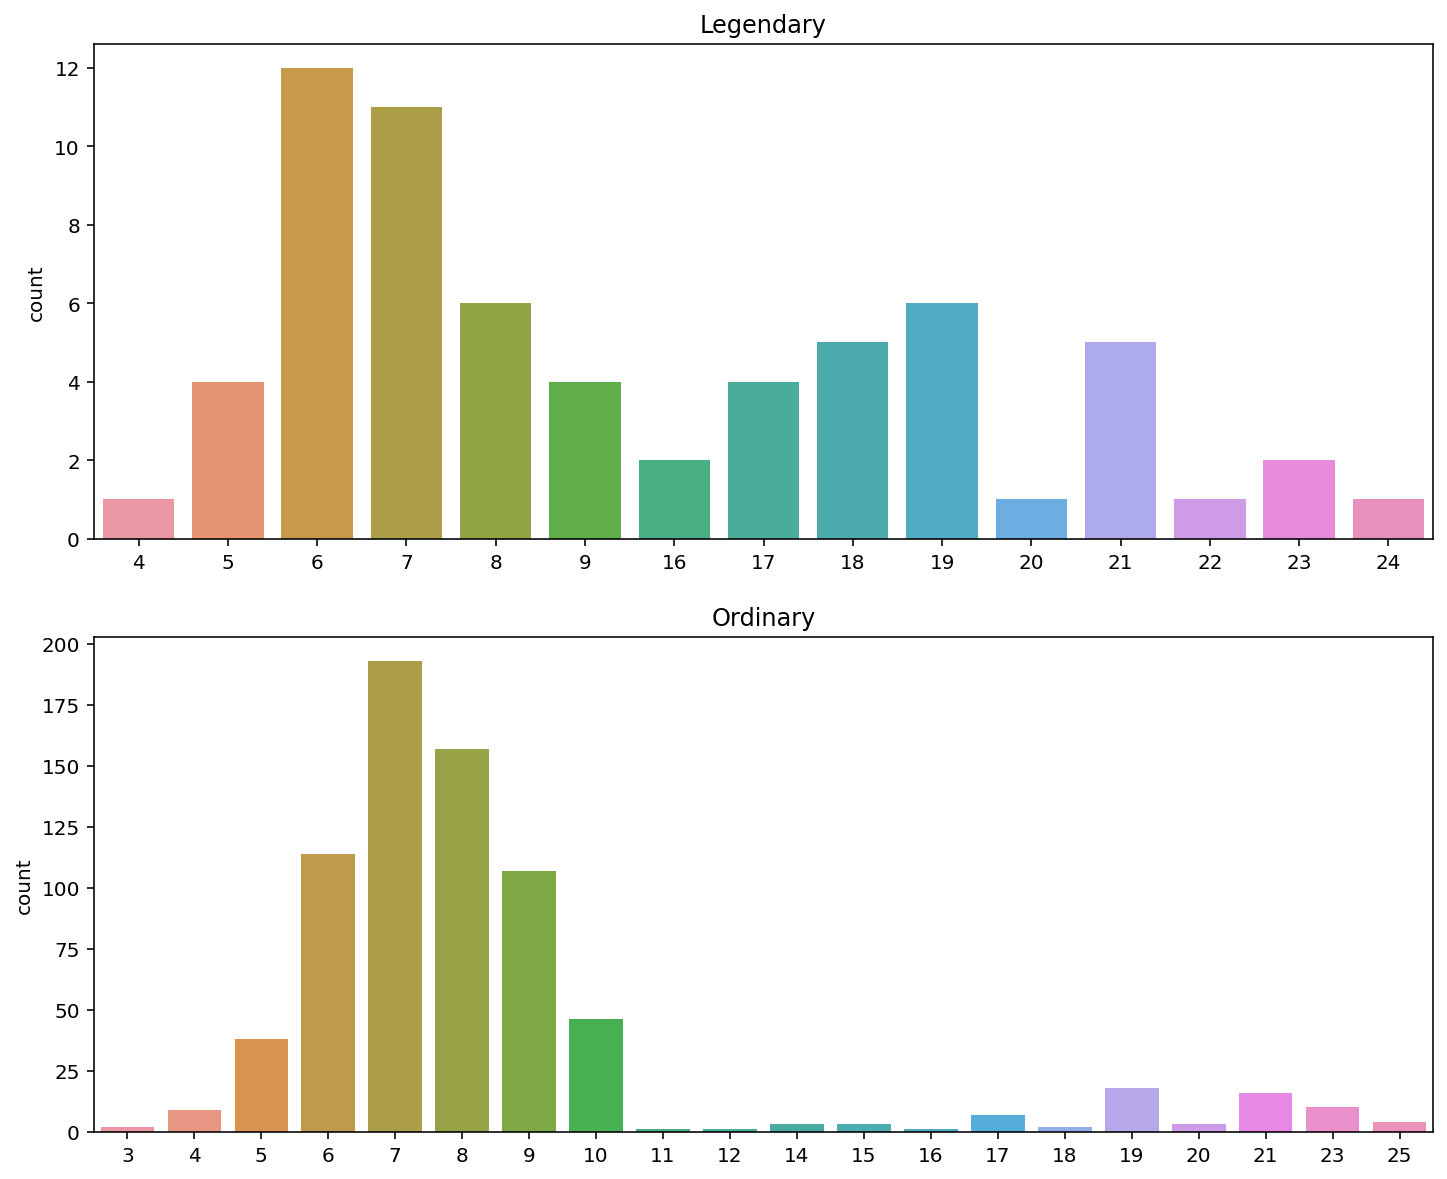

In [19]:
plt.figure(figsize=(12, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

In [20]:
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  name_count  
0       65       65     45           1      False           9  
1       80       80     60           1      False           7  
2      100      100     80           1      False           8  
3      122      120     80           1      False          21  
4       60       50     65           1      False          10

In [21]:
pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  name_count  long_name  
0       65       65     45           1      False           9      False  
1       80       80     60           1      False           7      False  
2      100      100     80           1      False           8      False  
3      122      120     80           1      False          21       True  
4       60       50     65           1      False          10       True

In [22]:
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon.tail()

#                 Name   Type 1 Type 2  Total  HP  Attack  Defense  \
795  719              Diancie     Rock  Fairy    600  50     100      150   
796  719  DiancieMega Diancie     Rock  Fairy    700  50     160      110   
797  720  HoopaHoopa Confined  Psychic  Ghost    600  80     110       60   
798  720   HoopaHoopa Unbound  Psychic   Dark    680  80     160       60   
799  721            Volcanion     Fire  Water    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  name_count  long_name  \
795      100      150     50           6       True           7      False   
796      160      110    110           6       True          19       True   
797      150      130     70           6       True          19       True   
798      170      130     80           6       True          18       True   
799      130       90     70           6       True           9      False   

           Name_nospace  
795             Diancie  
796  DiancieMegaDiancie  
797  HoopaHoopaConfined  
798   HoopaHoopaUnbound  
799           Volcanion

In [23]:
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  name_count  long_name  \
0       65       65     45           1      False           9      False   
1       80       80     60           1      False           7      False   
2      100      100     80           1      False           8      False   
3      122      120     80           1      False          21       True   
4       60       50     65           1      False          10       True   

           Name_nospace  name_isalpha  
0             Bulbasaur          True  
1               Ivysaur          True  
2              Venusaur          True  
3  VenusaurMegaVenusaur          True  
4            Charmander          True

In [24]:
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(9, 17)


#              Name   Type 1  Type 2  Total   HP  Attack  Defense  \
34    29          Nidoran♀   Poison     NaN    275   55      47       52   
37    32          Nidoran♂   Poison     NaN    273   46      57       40   
90    83        Farfetch'd   Normal  Flying    352   52      65       55   
131  122          Mr. Mime  Psychic   Fairy    460   40      45       65   
252  233          Porygon2   Normal     NaN    515   85      80       90   
270  250             Ho-oh     Fire  Flying    680  106     130       90   
487  439          Mime Jr.  Psychic   Fairy    310   20      25       45   
525  474         Porygon-Z   Normal     NaN    535   85      80       70   
794  718  Zygarde50% Forme   Dragon  Ground    600  108     100      121   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  name_count  long_name  \
34        40       40     41           1      False           8      False   
37        40       40     50           1      False           8      False   
90        58       62     60           1      False          10       True   
131      100      120     90           1      False           8      False   
252      105       95     60           2      False           8      False   
270      110      154     90           2       True           5      False   
487       70       90     60           4      False           8      False   
525      135       75     90           4      False           9      False   
794       81       95     95           6       True          16       True   

        Name_nospace  name_isalpha  
34          Nidoran♀         False  
37          Nidoran♂         False  
90        Farfetch'd         False  
131          Mr.Mime         False  
252         Porygon2         False  
270            Ho-oh         False  
487          MimeJr.         False  
525        Porygon-Z         False  
794  Zygarde50%Forme         False

In [25]:
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

#           Name   Type 1  Type 2  Total   HP  Attack  Defense  \
34    29      Nidoran X   Poison     NaN    275   55      47       52   
37    32      Nidoran Y   Poison     NaN    273   46      57       40   
90    83      Farfetchd   Normal  Flying    352   52      65       55   
131  122        Mr Mime  Psychic   Fairy    460   40      45       65   
252  233        Porygon   Normal     NaN    515   85      80       90   
270  250          Ho Oh     Fire  Flying    680  106     130       90   
487  439        Mime Jr  Psychic   Fairy    310   20      25       45   
525  474      Porygon Z   Normal     NaN    535   85      80       70   
794  718  Zygarde Forme   Dragon  Ground    600  108     100      121   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  name_count  long_name  \
34        40       40     41           1      False           8      False   
37        40       40     50           1      False           8      False   
90        58       62     60           1      False          10       True   
131      100      120     90           1      False           8      False   
252      105       95     60           2      False           8      False   
270      110      154     90           2       True           5      False   
487       70       90     60           4      False           8      False   
525      135       75     90           4      False           9      False   
794       81       95     95           6       True          16       True   

        Name_nospace  name_isalpha  
34         Nidoran X         False  
37         Nidoran Y         False  
90         Farfetchd         False  
131          Mr.Mime         False  
252          Porygon         False  
270            Ho Oh         False  
487          MimeJr.         False  
525        Porygon Z         False  
794  Zygarde50%Forme         False

In [26]:
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon[pokemon["name_isalpha"] == False]

Empty DataFrame
Columns: [#, Name, Type 1, Type 2, Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Generation, Legendary, name_count, long_name, Name_nospace, name_isalpha]
Index: []

In [27]:
import re

In [28]:
name = "CharizardMega Charizard X"

In [29]:
name_split = name.split(" ")
name_split

['CharizardMega', 'Charizard', 'X']

In [30]:
temp = name_split[0]
temp

'CharizardMega'

In [31]:
tokens = re.findall('[A-Z][a-z]*', temp)
tokens

['Charizard', 'Mega']

In [32]:
tokens = []
for part_name in name_split:
    a = re.findall('[A-Z][a-z]*', part_name)
    tokens.extend(a)
tokens

['Charizard', 'Mega', 'Charizard', 'X']

In [33]:
def tokenize(name):
    name_split = name.split(" ")
    
    tokens = []
    for part_name in name_split:
        a = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(a)
        
    return np.array(tokens)

In [34]:
name = "CharizardMega Charizard X"
tokenize(name)

array(['Charizard', 'Mega', 'Charizard', 'X'], dtype='<U9')

In [35]:
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', 'Form

In [36]:
from collections import Counter

In [37]:
most_common = Counter(token_set).most_common(10)
most_common

[('Forme', 15),
 ('Mega', 6),
 ('Mewtwo', 5),
 ('Kyurem', 5),
 ('Deoxys', 4),
 ('Hoopa', 4),
 ('Latias', 3),
 ('Latios', 3),
 ('Kyogre', 3),
 ('Groudon', 3)]

In [38]:
for token, _ in most_common:
    pokemon[token] = pokemon["Name"].str.contains(token)

pokemon.head(10)

#                       Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1                  Bulbasaur  Grass  Poison    318  45      49       49   
1  2                    Ivysaur  Grass  Poison    405  60      62       63   
2  3                   Venusaur  Grass  Poison    525  80      82       83   
3  3      VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4                 Charmander   Fire     NaN    309  39      52       43   
5  5                 Charmeleon   Fire     NaN    405  58      64       58   
6  6                  Charizard   Fire  Flying    534  78      84       78   
7  6  CharizardMega Charizard X   Fire  Dragon    634  78     130      111   
8  6  CharizardMega Charizard Y   Fire  Flying    634  78     104       78   
9  7                   Squirtle  Water     NaN    314  44      48       65   

   Sp. Atk  Sp. Def  ...  Forme   Mega  Mewtwo  Kyurem  Deoxys  Hoopa  Latias  \
0       65       65  ...  False  False   False   False   False  False   False   
1       80       80  ...  False  False   False   False   False  False   False   
2      100      100  ...  False  False   False   False   False  False   False   
3      122      120  ...  False   True   False   False   False  False   False   
4       60       50  ...  False  False   False   False   False  False   False   
5       80       65  ...  False  False   False   False   False  False   False   
6      109       85  ...  False  False   False   False   False  False   False   
7      130       85  ...  False   True   False   False   False  False   False   
8      159      115  ...  False   True   False   False   False  False   False   
9       50       64  ...  False  False   False   False   False  False   False   

   Latios  Kyogre  Groudon  
0   False   False    False  
1   False   False    False  
2   False   False    False  
3   False   False    False  
4   False   False    False  
5   False   False    False  
6   False   False    False  
7   False   False    False  
8   False   False    False  
9   False   False    False  

[10 rows x 27 columns]

In [39]:
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)
    
pokemon[[["Type 1", "Type 2"] + types][0]].head()

Type 1  Type 2    Bug  Grass   Dark  Water    Ice   Rock  Dragon  Ground  \
0  Grass  Poison  False   True  False  False  False  False   False   False   
1  Grass  Poison  False   True  False  False  False  False   False   False   
2  Grass  Poison  False   True  False  False  False  False   False   False   
3  Grass  Poison  False   True  False  False  False  False   False   False   
4   Fire     NaN  False  False  False  False  False  False   False   False   

   Flying  Psychic  Poison   Fire  Electric  Fairy  Ghost  Fighting  Steel  \
0   False    False    True  False     False  False  False     False  False   
1   False    False    True  False     False  False  False     False  False   
2   False    False    True  False     False  False  False     False  False   
3   False    False    True  False     False  False  False     False  False   
4   False    False   False   True     False  False  False     False  False   

   Normal  
0   False  
1   False  
2   False  
3   False  
4   False

In [40]:
pokemon[["Type 1", "Type 2"] + types].head()

Type 1  Type 2    Bug  Grass   Dark  Water    Ice   Rock  Dragon  Ground  \
0  Grass  Poison  False   True  False  False  False  False   False   False   
1  Grass  Poison  False   True  False  False  False  False   False   False   
2  Grass  Poison  False   True  False  False  False  False   False   False   
3  Grass  Poison  False   True  False  False  False  False   False   False   
4   Fire     NaN  False  False  False  False  False  False   False   False   

   Flying  Psychic  Poison   Fire  Electric  Fairy  Ghost  Fighting  Steel  \
0   False    False    True  False     False  False  False     False  False   
1   False    False    True  False     False  False  False     False  False   
2   False    False    True  False     False  False  False     False  False   
3   False    False    True  False     False  False  False     False  False   
4   False    False   False   True     False  False  False     False  False   

   Normal  
0   False  
1   False  
2   False  
3   False  
4   False

In [41]:
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

In [42]:
target = 'Legendary'

In [43]:
X = original_data[features]
print(X.shape)
X.head()

(800, 8)


Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation
0    318  45      49       49       65       65     45           1
1    405  60      62       63       80       80     60           1
2    525  80      82       83      100      100     80           1
3    625  80     100      123      122      120     80           1
4    309  39      52       43       60       50     65           1

In [44]:
y = original_data[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [48]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[144,   3],
       [  5,   8]])

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



In [51]:
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 
            'name_count', 'long_name', 'Forme', 'Mega', 'Mewtwo', 'Kyurem', 'Deoxys', 'Hoopa', 
            'Latias', 'Latios', 'Kyogre', 'Groudon', 'Poison', 'Water', 'Steel', 'Grass', 
            'Bug', 'Normal', 'Fire', 'Fighting', 'Electric', 'Psychic', 'Ghost', 'Ice', 
            'Rock', 'Dark', 'Flying', 'Ground', 'Dragon', 'Fairy']

len(features)

38

In [52]:
X = pokemon[features]
print(X.shape)
X.head()

(800, 38)


Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  \
0    318  45      49       49       65       65     45           1   
1    405  60      62       63       80       80     60           1   
2    525  80      82       83      100      100     80           1   
3    625  80     100      123      122      120     80           1   
4    309  39      52       43       60       50     65           1   

   name_count  long_name  ...  Electric  Psychic  Ghost    Ice   Rock   Dark  \
0           9      False  ...     False    False  False  False  False  False   
1           7      False  ...     False    False  False  False  False  False   
2           8      False  ...     False    False  False  False  False  False   
3          21       True  ...     False    False  False  False  False  False   
4          10       True  ...     False    False  False  False  False  False   

   Flying  Ground  Dragon  Fairy  
0   False   False   False  False  
1   False   False   False  False  
2   False   False   False  False  
3   False   False   False  False  
4   False   False   False  False  

[5 rows x 38 columns]

In [53]:
y = pokemon[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 38) (640,)
(160, 38) (160,)


In [55]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [56]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [57]:
confusion_matrix(y_test, y_pred)

array([[141,   6],
       [  1,  12]])

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160

